## Motivating Example

We discussed the Poisson distribution in section 17. 
- Recall that the count of arrivals within a time period is a random variable 
    - Since arrival count MUST be an integer, we called this a discrete poisson variable. (e.g. you cannot get 4.5 calls in a day. Either you have 4, or you have 5)
- Instead of arrival counts, what if you now want to know the time of first arrival?
    - Here, the time (let's call it X) can take on any value. It can be 1 second, 1.1 second, 1.11 second etc.

**Example:** 
- Suppose radioactive particles hit a Geiger counter by a Poisson process with a rate of $\lambda = 0.8$ particles per second. Let the time of the first particle's arrival be $T$
- What is the probability that the first particle arrives after 2 seconds? That is, find $P(T > 2)$
    - Let the number of particles in the first 2 seconds be X
    - This is the same as asking for $P(X = 0)$

$$\begin{align}
P(T > 2) &= P(X = 0) \\
&= e^{-\lambda \cdot t} \frac{{(\lambda \cdot t)}^{x}} {x!} \\
&= e^{-0.8*2} \frac{(0.8*2)^{0}}{0!} \\
&= e^{-1.6} \\
&\approx 0.202
\end{align}$$

- What is the probability that the first particle arrives between 2 and 3 seconds? That is, find $P(2 < T < 3)$
    - Previously, we used the fact that $P(T > 2) \equiv P(X_2 = 0)$, where X represents the count of particles in the first 2 seconds. Let's do something similar here. 
    - Probability of particle arriving between 2 and 3, is the probability of particle arriving within first 3 seconds minus probability of particle arriving within first 2 seconds
        - $$\begin{align}
            P(\text{First particle arrives within 3 seconds}) &= P(T <= 3) \\
            &= 1 - P(T > 3) \\ 
            &= 1 - P(X_3 = 0)
            \end{align} $$
        - $$\begin{align}
            P(\text{First particle arrives within 2 seconds}) &= P(T <= 2) \\
            &= 1 - P(X_2 = 0) & (\text{Same logic as above})
            \end{align} $$
        - $$\begin{align}
            P(2 < T < 3) &= P(T <= 3)  - P(T <= 2) \\
            &= (1 - P(X_3 = 0)) - (1 - P(X_2 = 0)) \\
            &= P(X_2 = 0) - P(X_3 = 0) \\
            &= e^{-0.8*2} - e^{-0.8*3} \\
            &\approx 0.111
            \end{align}$$

- We have found $P(2 < T < 3)$. However, this is just for 1 specific interval of $T$. We know that $T \in (0, \inf)$, and so there are infinitely many ranges that are posible!

- As such, how can we describe the value of T more generally?
    - Can we derive a CDF? $P(T \le x), \forall x \in \mathbb{R}$
    - Can we derive a PMF? $P(T = x), \forall x \in \mathbb{R}$

## Theory

### CDF

- Let CDF be $F(t) = P(T \le t)$
- CDF of the continuous poisson distribution is quite basic, just use the substitution trick definition above!
    - Let $T$ be a random variable representing the time of first arrival 
    - Let $t$ be the actual value that $T$ takes on, between 0 and $\inf$
    - Let $X_{t}$ be the number of particles detected at time $t$
    - $P(T \le t)$ is the probability that the time of first arrival is less than $t$
    - Rewriting, it is simply equals to the 1 - probability that the time of first arrival is after $t$
    - The probability that the time of first arrival is after $t$ is simply the probability that there are no arrivals before t, and so it is the probability that $X_{t}$ is 0. This applies if $t >= 0$, else $F(t) = 0$ because time cannot be negative

$$\begin{align}
F(t) &= P(T \le t) \\
&= 1 - P(X_{t} = 0) \\
&= 1 - e^{-\lambda \cdot t} \frac{(\lambda \cdot t)^{0}}{0!} \\
&= 1 - e^{-\lambda \cdot t}
\end{align}$$

- Let's extend this result to intervals. We now know how to solve for $P(T \le t)$. What if we want to know $P(t_1 \le T \le t_2)$?
    - Again, we make use of the result from the motivating example.

$$\begin{align}
P(t_1 \le T \le t_2) &= (1 - e^{-\lambda \cdot t_2}) - (1 - e^{-\lambda \cdot t_1}) \\
&= e^{-\lambda \cdot t_1} - e^{-\lambda \cdot t_2}
\end{align}$$

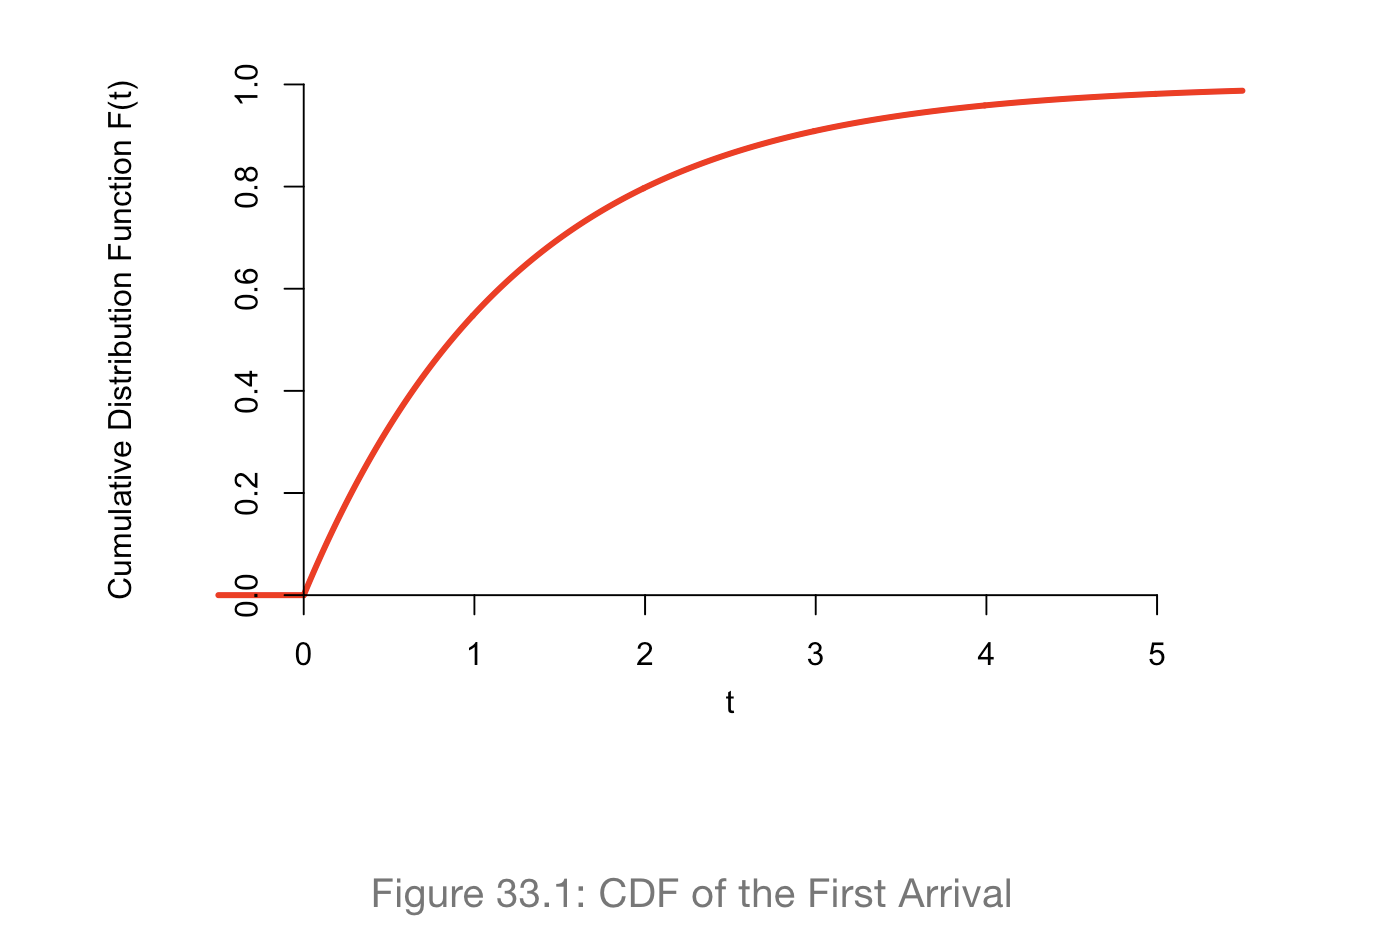

- Unlike previous discrete distributions, notice that the CDF is now a smooth curve! This is because $t$ is continuous, not discrete

### Example 33.2

- **Definition 33.1**: In cases where the random variable is continuous, the probability that it takes on any specific value is 0. Hence, it does not have a probability mass function (PMF) Instead, we will introduce a new concept here called a probability density function (PDF) instead

- Proof
    - Let's extend the motivating example above. We want to find the probability that the first particle hits the Geiger counter at exactly 2 seconds
        - i.e. $P(T = 2)$

    - To solve this, let's imagine we are finding the probabilty for the time range $(2-\epsilon, 2+\epsilon)$
    - Let's make use of the result for interval probability in the `CDF` section
        - $$\begin{align}
            P(t_1 \le T \le t_2) &= e^{-\lambda \cdot t_1} - e^{-\lambda \cdot t_2} \\
            &= e^{-\lambda \cdot (2 - \epsilon)} - e^{-\lambda \cdot (2 + \epsilon)}
            \end{align}$$
    - But for a specific value of $t$, $\epsilon$ gets arbitrarily small
    - As a result, $P(t_1 \le T \le t_2) \rightarrow 0$ as $\epsilon \rightarrow 0$ 

    

### Probability density function (PDF)

- As established above, there is no PMF when talking about continuous random variables
- Instead, a new concept called a PDF is defined instead.
- **Definition 33.3:** PDF is defined as the instantaneous change of the CDF for a particular value of $t$, or the derivative of the CDF
    - $$ \text{PDF} = f(t) = F'(t)
    - Note that the PDF is **NOT** probability (i.e. it is not $P(T=t)$, because $P(T=t) = 0$ as shown above)

### Example 33.3 (PDF of first arrival)

- We previously showed that the CDF is given by the following

$$
F(t) = \begin{Bmatrix}
    1 - e^{-0.8t} & t \ge 0 \\
    0 & t \lt 0
\end{Bmatrix}
$$

- By the definition of PDF, we take the derivative of CDF

$$
f(t) = F'(t) = \begin{Bmatrix}
    0.8 e^{-0.8t} & t \ge 0 \\
    0 & t \lt 0
\end{Bmatrix}
$$

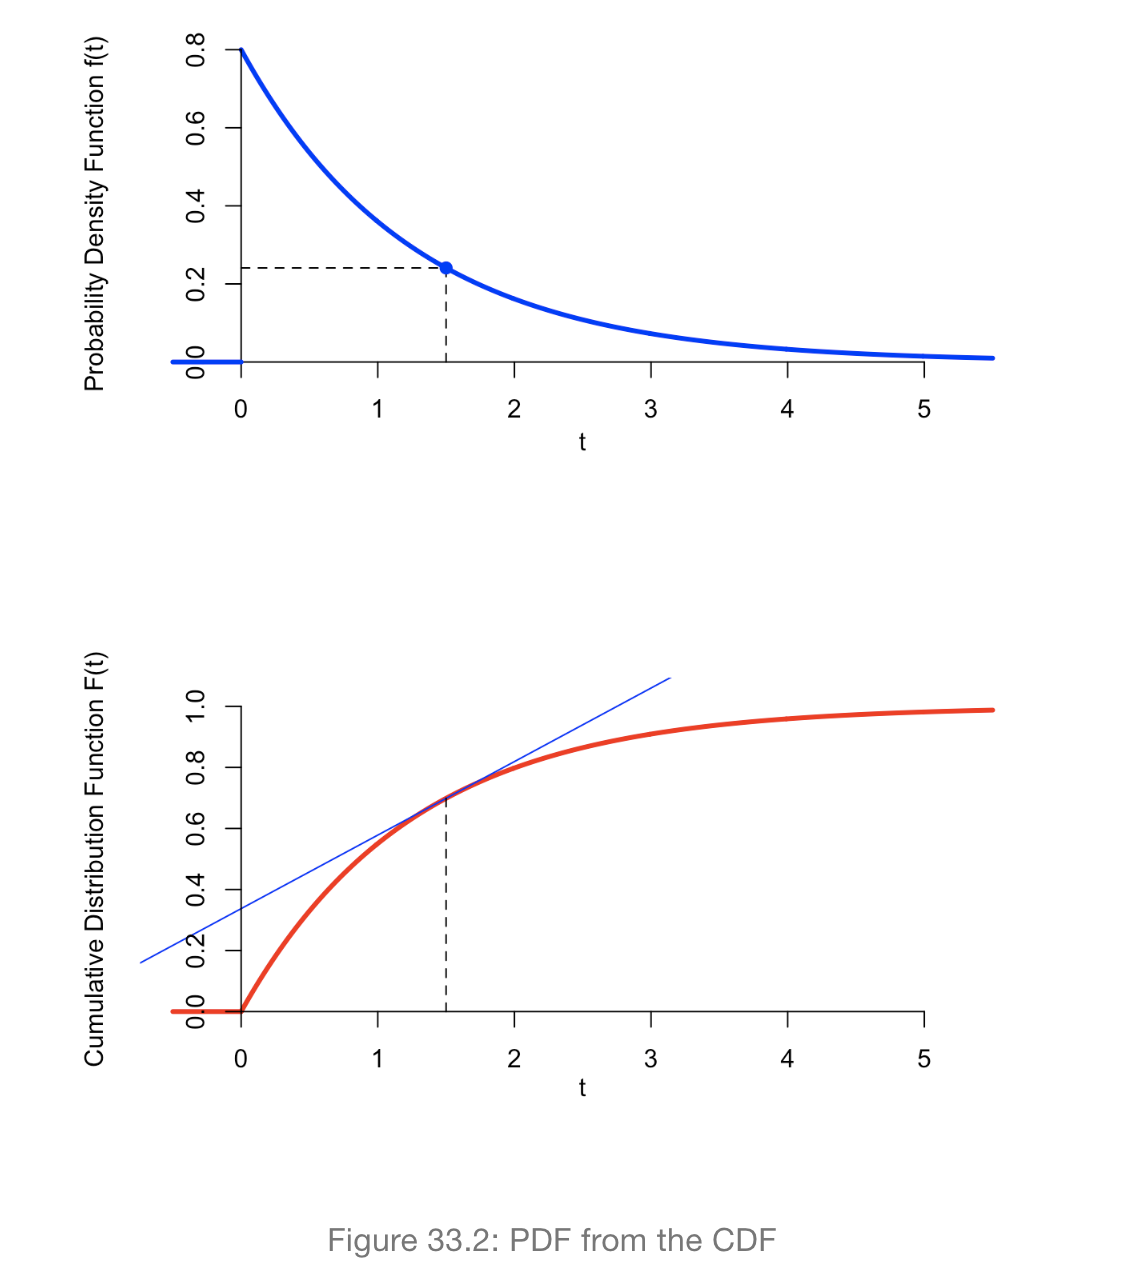

- So what is this telling us?
    - The CDF is increasing fastest at the start then decreasing 
    - That is, the PDF is highest at the start
    - So it is much more likely that the first arrival happens earlier rather than later 

- **Theorem 33.1 (Calculate probability with PDF)**: Since the y value of a PDF does not represent probability, how do we use it? Simple! We integrate under the PDF to generate probabilities!! Area under the PDF will always come up to 1

$$
P(a \lt X \le b) = \int_a^b f(x) dx
$$

- Proof
    - Assume F(x) is the cdf of X. Then we know from motivating example that $P(a \lt X \le b) = P(X \le b) - P(X \le a) = F(b) - F(a)$
    - Then, by fundamental theorem of calculus, $F(b) - F(a) = \int_a^{b} f(x) dx$
    - Seen this way, we can see clearly why the probability that $X=x$ is 0, because integrating $f(x)$ when a = b = x is simply 0 (since there is no area under the curve)

### Example 33.4 (Calculating probabilities using PDF)

- We know that the PDF of the first arrival T is given by

$$
f(t) = \begin{Bmatrix}
    0.8 e^{-0.8t} & t \ge 0 \\ 
    0 & t \lt 0
\end{Bmatrix}
$$


- To find probabilities, we simply integrate the equation above (e.g.)
    - $P(2 \lt T \lt 3) = \int_2^3 f(t) dt = \int_2^3 0.8 e^{-0.8t} \approx 0.111$

### Example 33.5 (Calculating CDF using PDF)

- We can also compute the CDF from the PDF, since the CDF is simply the integration of the PDF from $-\inf$. For example, let's say we want to find the probability that the first arrival happens before 3 seconds
    - $P(T < 3) = F(3) = \int_{-\inf}^{3} f(t) dt = \int_{0}^{3} 0.8 e^{-0.8t} dt = 0.909$